<a href="https://colab.research.google.com/github/Iammanan07/Customer-Churn-Prediction-/blob/main/Customer_Churn_Prediction_%7C_EDA_and_Model_with%F0%9F%93%8898%25_ACC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Project Title: Customer Churn Prediction | EDA and ML Models - Abhishek Pandey</p></b></h1>

### Tabel of Contents:

* [Introduction](#0)
* [Import Libraries](#1)
* [Load Dataset](#2)
* [EDA](#3)
* [Preprocessing](#4)
* [ML Models](#5)
* [Like this? Upvote and comment! 🌊 End](#6)

**<a id="0"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Introduction</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

<center><span style="font-family:Palatino; font-size:22px;"><i> Did you know that acquiring a new customer can be up to <span style="color:#DC143C;">five times</span> times more expensive than retaining an existing one?</i></span> </center>

![churn 1.png](https://miro.medium.com/v2/resize:fit:1024/1*TgciopaOk-C8fwtPmmet3w.png)

**Customer churn** refers to the loss of customers who discontinue using a product or service. This phenomenon occurs when customers cancel their subscriptions or stop engaging with a company for various reasons, such as dissatisfaction with the service, better offers from competitors, or simply no longer needing the product. Predicting customer churn is crucial for businesses, as it helps them understand the factors leading to customer loss and take steps to retain their clientele.

The **Customer Churn Prediction Project** focuses on predicting customer churn by leveraging machine learning techniques to analyze customer behavior, demographics, and interaction history. The goal is to identify customers at risk of leaving and to build robust predictive models using algorithms such as logistic regression, random forests, and gradient boosting. By providing accurate predictions, the project enables businesses to implement proactive measures to reduce churn, optimize customer retention strategies, and ultimately improve overall performance.

**<a id="1"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Import Libraries</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [1]:
# Manipulation and Visualasation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
# Libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, f1_score, precision_score, recall_score,roc_curve, roc_auc_score
from imblearn.combine import SMOTEENN

# Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
! pip install catboost
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
# ignore warning
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.8 MB/s eta 0:00:00


**<a id="2"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Load Dataset</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [2]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
### Shape of Dataset
print(f"The dataset has {data.shape[0]} Rows and {data.shape[1]} columns")

The dataset has 7043 Rows and 21 columns


In [4]:
### Info of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
### Descriptive Analysis
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [6]:
### Missing Values
data.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
### Duplicated Values
data[data.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


**<a id="3"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">EDA</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [8]:
### Gender Distrbution
data.gender.value_counts().to_frame()

,count
gender,
Male,3555
Female,3488


In [9]:
### Gender VS Churn
data.groupby(['Churn','gender'])['gender'].count()

Churn  gender
No     Female    2549
       Male      2625
Yes    Female     939
       Male       930
Name: gender, dtype: int64

In [10]:
fig = px.pie(data, title="Gender Distribution",names="gender", color_discrete_sequence=px.colors.sequential.Brwnyl_r)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='red'),
    template="plotly_dark",
    width=500,
    height=500
)
fig.add_annotation(
    text="Gender",
    showarrow=False,
    font=dict(size=20, color="red"),
    xref="paper", yref="paper",
    x=0.5, y=0.5
)
fig.show()

In [11]:
churn_summary = data.groupby(['gender', 'Churn']).size().reset_index(name='Count')
fig = px.bar(churn_summary,
             x='gender',
             y='Count',
             color='Churn',
             title='Gender VS Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.Sunset_r)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='orange'),
    template='plotly_dark',
    barmode='group',
    xaxis_title='Gender',
    yaxis_title='Count',
    width=500,
    height=500
)
fig.show()

In [12]:
### Senior Citizen Distrbution
data.SeniorCitizen.value_counts().to_frame()

,count
SeniorCitizen,
0,5901
1,1142


In [13]:
### Senior Citizen VS Churn
data.groupby(['Churn','SeniorCitizen'])['SeniorCitizen'].count()

Churn  SeniorCitizen
No     0                4508
       1                 666
Yes    0                1393
       1                 476
Name: SeniorCitizen, dtype: int64

In [14]:
### Senior Citizen VS Gender
data.groupby(['gender','SeniorCitizen'])['SeniorCitizen'].count()

gender  SeniorCitizen
Female  0                2920
        1                 568
Male    0                2981
        1                 574
Name: SeniorCitizen, dtype: int64

In [15]:
fig = px.pie(data, title="Senior Citizen Distribution",names="SeniorCitizen", color_discrete_sequence=px.colors.sequential.Sunset_r)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='orange'),
    template="plotly_dark",
    width=500,
    height=500
)
fig.add_annotation(
    text="Senior Citizen",
    showarrow=False,
    font=dict(size=20, color="orange"),
    xref="paper", yref="paper",
    x=0.5, y=0.5
)
fig.show()

In [16]:
senior_churn_summary = data.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Count')
fig_senior_churn = px.bar(senior_churn_summary,
                          x='SeniorCitizen',
                          y='Count',
                          color='Churn',
                          text='Count',
                          color_discrete_sequence=px.colors.sequential.Sunset_r)
senior_gender_summary = data.groupby(['SeniorCitizen', 'gender']).size().reset_index(name='Count')
fig_senior_gender = px.bar(senior_gender_summary,
                           x='SeniorCitizen',
                           y='Count',
                           color='gender',
                           text='Count',
                           color_discrete_sequence=px.colors.sequential.Sunsetdark_r)
fig = make_subplots(
    rows=1, cols=2,
)
for trace in fig_senior_churn.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig_senior_gender.data:
    fig.add_trace(trace, row=1, col=2)
fig.add_annotation(text="Senior Citizen VS Churn",
                   font=dict(size=16, color='black'),
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=0.23, y=1,
                   xanchor='center', yanchor='bottom')

fig.add_annotation(text="Senior Citizen VS Gender",
                   font=dict(size=16, color='red'),
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=.77, y=1,
                   xanchor='center', yanchor='bottom')
fig.update_layout(
    title_text="Senior Citizen Analysis",
    title_x=0.5,
    title_font=dict(size=20, color='orange'),
    template="plotly_dark",
    width=1000,
    height=500
)
fig.show()

In [17]:
### Partner Distrbution
data.Partner.value_counts().to_frame()

,count
Partner,
No,3641
Yes,3402


In [18]:
### Partner VS Churn
data.groupby(['Churn','Partner'])['Partner'].count()

Churn  Partner
No     No         2441
       Yes        2733
Yes    No         1200
       Yes         669
Name: Partner, dtype: int64

In [19]:
### Partner VS Gender
data.groupby(['gender','Partner'])['Partner'].count()

gender  Partner
Female  No         1800
        Yes        1688
Male    No         1841
        Yes        1714
Name: Partner, dtype: int64

In [20]:
fig = px.pie(data, title="Partner Distribution",names="Partner", color_discrete_sequence=px.colors.sequential.thermal)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=16, color='blue'),
    template="plotly_dark",
    width=500,
    height=500
)
fig.add_annotation(
    text="Partner",
    showarrow=False,
    font=dict(size=20, color="blue"),
    xref="paper", yref="paper",
    x=0.5, y=0.5
)
fig.show()

In [21]:
partner_churn_summary = data.groupby(['Partner', 'Churn']).size().reset_index(name='Count')
fig_partner_churn = px.bar(partner_churn_summary,
                          x='Partner',
                          y='Count',
                          color='Churn',
                          text='Count',
                          color_discrete_sequence=px.colors.sequential.thermal)
partner_gender_summary = data.groupby(['Partner', 'gender']).size().reset_index(name='Count')
fig_partner_gender = px.bar(partner_gender_summary,
                           x='Partner',
                           y='Count',
                           color='gender',
                           text='Count',
                           color_discrete_sequence=px.colors.sequential.thermal_r)
fig = make_subplots(
    rows=1, cols=2,
)
for trace in fig_partner_churn.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig_partner_gender.data:
    fig.add_trace(trace, row=1, col=2)
fig.add_annotation(text="Partner VS Churn",
                   font=dict(size=16, color='blue'),
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=0.23, y=1,
                   xanchor='center', yanchor='bottom')

fig.add_annotation(text="Partner VS Gender",
                   font=dict(size=16, color='black'),
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=.77, y=1,
                   xanchor='center', yanchor='bottom')
fig.update_layout(
    title_text="Partner Analysis",
    title_x=0.5,
    title_font=dict(size=20, color='red'),
    template="plotly_dark",
    width=1000,
    height=500
)
fig.show()

In [22]:
### Dependents Distrbution
data.Dependents.value_counts().to_frame()

,count
Dependents,
No,4933
Yes,2110


In [23]:
### Dependents VS Churn
data.groupby(['Churn','Dependents'])['Dependents'].count()

Churn  Dependents
No     No            3390
       Yes           1784
Yes    No            1543
       Yes            326
Name: Dependents, dtype: int64

In [24]:
### Dependents VS Gender
data.groupby(['gender','Dependents'])['Dependents'].count()

gender  Dependents
Female  No            2460
        Yes           1028
Male    No            2473
        Yes           1082
Name: Dependents, dtype: int64

In [25]:
fig = px.pie(data, title="Dependents Distribution",names="Dependents", color_discrete_sequence=px.colors.sequential.Rainbow_r)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='orange'),
    template="plotly_dark",
    width=500,
    height=500
)
fig.add_annotation(
    text="Dependents",
    showarrow=False,
    font=dict(size=20, color="yellow"),
    xref="paper", yref="paper",
    x=0.5, y=0.5
)
fig.show()

In [26]:
dependents_churn_summary = data.groupby(['Dependents', 'Churn']).size().reset_index(name='Count')
fig_dependents_churn = px.bar(dependents_churn_summary,
                          x='Dependents',
                          y='Count',
                          color='Churn',
                          text='Count',
                          color_discrete_sequence=px.colors.sequential.Rainbow_r)
dependents_gender_summary = data.groupby(['Dependents', 'gender']).size().reset_index(name='Count')
fig_dependents_gender = px.bar(dependents_gender_summary,
                           x='Dependents',
                           y='Count',
                           color='gender',
                           text='Count',
                           color_discrete_sequence=px.colors.sequential.Rainbow)
fig = make_subplots(
    rows=1, cols=2,
)
for trace in fig_dependents_churn.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig_dependents_gender.data:
    fig.add_trace(trace, row=1, col=2)
fig.add_annotation(text="Dependents VS Churn",
                   font=dict(size=16, color='orange'),
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=0.23, y=1,
                   xanchor='center', yanchor='bottom')
fig.add_annotation(text="Dependents VS Gender",
                   font=dict(size=16, color='blue'),
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=.77, y=1,
                   xanchor='center', yanchor='bottom')
fig.update_layout(
    title_text="Dependents Analysis",
    title_x=0.5,
    title_font=dict(size=20, color='purple'),
    template="plotly_dark",
    width=1000,
    height=500
)
fig.show()

In [27]:
### Tenure Distrbution
min_tenure = data['tenure'].min()
max_tenure = data['tenure'].max()
# Print the results
print(f"Minimum Tenure: {min_tenure}")
print(f"Maximum Tenure: {max_tenure}")

Minimum Tenure: 0
Maximum Tenure: 72


In [28]:
fig = px.box(data,y='tenure',title="Tenure Distribution", color_discrete_sequence=px.colors.sequential.Cividis_r)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='yellow'),
    template="plotly_dark",
    width=500,
    height=500
)
fig.add_annotation(
    text="Tenure",
    showarrow=False,
    font=dict(size=20, color="yellow"),
    xref="paper", yref="paper",
    x=0.5, y=0.5
)
fig.show()

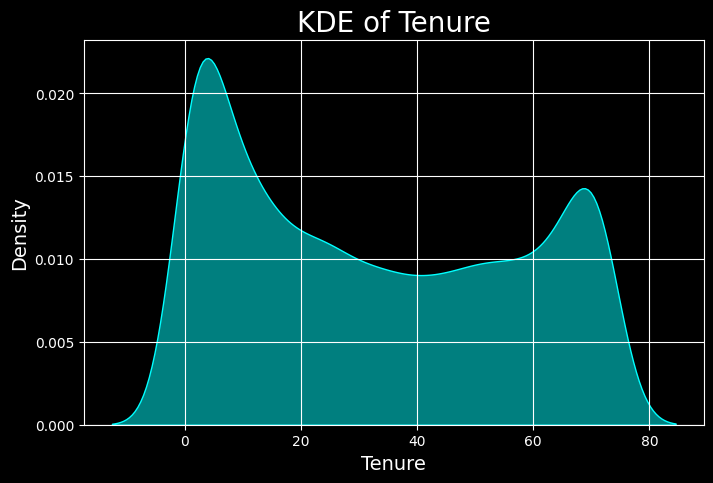

In [29]:
plt.style.use('dark_background')
plt.figure(figsize=(8, 5))
sns.kdeplot(data['tenure'], color='cyan', fill=True, alpha=0.5)
plt.title('KDE of Tenure', fontsize=20)
plt.xlabel('Tenure', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
### Phone Service Distrbution
data.PhoneService.value_counts().to_frame()

In [ ]:
### Phone Service VS Churn
data.groupby(['Churn','PhoneService'])['PhoneService'].count()

In [ ]:
### Phone Service VS Gender
data.groupby(['gender','PhoneService'])['PhoneService'].count()

In [30]:
fig = px.pie(data, title="Phone Service Distribution",names="PhoneService", color_discrete_sequence=px.colors.sequential.Plotly3)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='blue'),
    template="plotly_dark",
    width=500,
    height=500
)
fig.add_annotation(
    text="Phone Service",
    showarrow=False,
    font=dict(size=20, color="blue"),
    xref="paper", yref="paper",
    x=0.5, y=0.5
)
fig.show()

In [31]:
phone_churn_summary = data.groupby(['PhoneService', 'Churn']).size().reset_index(name='Count')
fig_phone_churn = px.bar(phone_churn_summary,
                          x='PhoneService',
                          y='Count',
                          color='Churn',
                          text='Count',
                          color_discrete_sequence=px.colors.sequential.haline)
phone_gender_summary = data.groupby(['PhoneService', 'gender']).size().reset_index(name='Count')
fig_phone_gender = px.bar(phone_gender_summary,
                           x='PhoneService',
                           y='Count',
                           color='gender',
                           text='Count',
                           color_discrete_sequence=px.colors.sequential.haline_r)
fig = make_subplots(
    rows=1, cols=2,
)
for trace in fig_phone_churn.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig_phone_gender.data:
    fig.add_trace(trace, row=1, col=2)
fig.add_annotation(text="Phone Service VS Churn",
                   font=dict(size=16, color='blue'),
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=0.23, y=1,
                   xanchor='center', yanchor='bottom')
fig.add_annotation(text="Phone Service VS Gender",
                   font=dict(size=16, color='yellowgreen'),
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=.77, y=1,
                   xanchor='center', yanchor='bottom')
fig.update_layout(
    title_text="Phone Service Analysis",
    title_x=0.5,
    title_font=dict(size=20, color='mediumvioletred'),
    template="plotly_dark",
    width=1000,
    height=500
)
fig.show()

In [32]:
### Multiple Lines Distrbution
data.MultipleLines.value_counts().to_frame()

,count
MultipleLines,
No,3390
Yes,2971
No phone service,682


In [33]:
### Multiple Lines VS Churn
data.groupby(['Churn','MultipleLines'])['MultipleLines'].count()

Churn  MultipleLines   
No     No                  2541
       No phone service     512
       Yes                 2121
Yes    No                   849
       No phone service     170
       Yes                  850
Name: MultipleLines, dtype: int64

In [34]:
fig = px.pie(data, title="Multiple Lines Distribution",names="MultipleLines", color_discrete_sequence=px.colors.sequential.matter_r)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='purple'),
    template="plotly_dark",
    width=500,
    height=500
)
fig.add_annotation(
    text="Lines",
    showarrow=False,
    font=dict(size=20, color="purple"),
    xref="paper", yref="paper",
    x=0.5, y=0.5
)
fig.show()

In [35]:
churn_summary = data.groupby(['MultipleLines', 'Churn']).size().reset_index(name='Count')
fig = px.bar(churn_summary,
             x='MultipleLines',
             y='Count',
             color='Churn',
             title='Multiple Lines VS Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.Purples_r)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='dodgerblue'),
    template='plotly_dark',
    barmode='group',
    xaxis_title='Multiple Lines',
    yaxis_title='Count',
    width=500,
    height=500
)
fig.show()

In [36]:
### Internet Service Distrbution
data.InternetService.value_counts().to_frame()

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


In [37]:
### Internet Service VS Churn
data.groupby(['Churn','InternetService'])['InternetService'].count()

Churn  InternetService
No     DSL                1962
       Fiber optic        1799
       No                 1413
Yes    DSL                 459
       Fiber optic        1297
       No                  113
Name: InternetService, dtype: int64

In [38]:
fig = px.pie(data, title="Internet Service Distribution",names="InternetService", color_discrete_sequence=px.colors.sequential.Emrld_r)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='gray'),
    template="plotly_dark",
    width=500,
    height=500
)
fig.add_annotation(
    text="Internet",
    showarrow=False,
    font=dict(size=20, color="gray"),
    xref="paper", yref="paper",
    x=0.5, y=0.5
)
fig.show()

In [39]:
churn_summary = data.groupby(['InternetService', 'Churn']).size().reset_index(name='Count')
fig = px.bar(churn_summary,
             x='InternetService',
             y='Count',
             color='Churn',
             title='Internet Service VS Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.Viridis_r)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='yellowgreen'),
    template='plotly_dark',
    barmode='group',
    xaxis_title='Internet Service',
    yaxis_title='Count',
    width=500,
    height=500
)
fig.show()

In [41]:
### Online Security Distrbution
data.OnlineSecurity.value_counts().to_frame()

,count
OnlineSecurity,
No,3498
Yes,2019
No internet service,1526


In [42]:
### Online Security VS Churn
data.groupby(['Churn','OnlineSecurity'])['OnlineSecurity'].count()

Churn  OnlineSecurity     
No     No                     2037
       No internet service    1413
       Yes                    1724
Yes    No                     1461
       No internet service     113
       Yes                     295
Name: OnlineSecurity, dtype: int64

In [40]:
fig = px.pie(data, title="Online Security Distribution",names="OnlineSecurity", color_discrete_sequence=px.colors.sequential.Agsunset)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='plum'),
    template="plotly_dark",
    width=500,
    height=500
)
fig.add_annotation(
    text="Security",
    showarrow=False,
    font=dict(size=20, color="plum"),
    xref="paper", yref="paper",
    x=0.5, y=0.5
)
fig.show()

In [43]:
churn_summary = data.groupby(['OnlineSecurity', 'Churn']).size().reset_index(name='Count')
fig = px.bar(churn_summary,
             x='OnlineSecurity',
             y='Count',
             color='Churn',
             title='Online Security VS Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.YlOrRd_r)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='red'),
    template='plotly_dark',
    barmode='group',
    xaxis_title='Online Security',
    yaxis_title='Count',
    width=500,
    height=500
)
fig.show()

In [45]:
### Online Backup Distrbution
data.OnlineBackup.value_counts().to_frame()

,count
OnlineBackup,
No,3088
Yes,2429
No internet service,1526


In [44]:
### Online Backup VS Churn
data.groupby(['Churn','OnlineBackup'])['OnlineBackup'].count()

Churn  OnlineBackup       
No     No                     1855
       No internet service    1413
       Yes                    1906
Yes    No                     1233
       No internet service     113
       Yes                     523
Name: OnlineBackup, dtype: int64

In [46]:
fig = px.pie(data, title="Online Backup Distribution",names="OnlineBackup", color_discrete_sequence=px.colors.sequential.Aggrnyl_r)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='mediumspringgreen'),
    template="plotly_dark",
    width=500,
    height=500
)
fig.add_annotation(
    text="Backup",
    showarrow=False,
    font=dict(size=20, color="mediumspringgreen"),
    xref="paper", yref="paper",
    x=0.5, y=0.5
)
fig.show()

In [47]:
churn_summary = data.groupby(['OnlineBackup', 'Churn']).size().reset_index(name='Count')
fig = px.bar(churn_summary,
             x='OnlineBackup',
             y='Count',
             color='Churn',
             title='Online Backup VS Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.YlGnBu_r)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='darkblue'),
    template='plotly_dark',
    barmode='group',
    xaxis_title='Online Backup',
    yaxis_title='Count',
    width=500,
    height=500
)
fig.show()

In [48]:
### Device Protection Distrbution
data.DeviceProtection.value_counts().to_frame()

,count
DeviceProtection,
No,3095
Yes,2422
No internet service,1526


In [49]:
### Device Protection VS Churn
data.groupby(['Churn','DeviceProtection'])['DeviceProtection'].count()

Churn  DeviceProtection   
No     No                     1884
       No internet service    1413
       Yes                    1877
Yes    No                     1211
       No internet service     113
       Yes                     545
Name: DeviceProtection, dtype: int64

In [50]:
fig = px.pie(data, title="Device Protection Distribution",names="DeviceProtection", color_discrete_sequence=px.colors.sequential.Bluyl_r)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='dodgerblue'),
    template="plotly_dark",
    width=500,
    height=500
)
fig.add_annotation(
    text="Protection",
    showarrow=False,
    font=dict(size=20, color="dodgerblue"),
    xref="paper", yref="paper",
    x=0.5, y=0.5
)
fig.show()

In [51]:
churn_summary = data.groupby(['DeviceProtection', 'Churn']).size().reset_index(name='Count')
fig = px.bar(churn_summary,
             x='DeviceProtection',
             y='Count',
             color='Churn',
             title='Device Protection VS Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.PuBuGn_r)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='springgreen'),
    template='plotly_dark',
    barmode='group',
    xaxis_title='Device Protection',
    yaxis_title='Count',
    width=500,
    height=500
)
fig.show()

In [52]:
### Tech Support Distrbution
data.TechSupport.value_counts().to_frame()

,count
TechSupport,
No,3473
Yes,2044
No internet service,1526


In [53]:
### Tech Support VS Churn
data.groupby(['Churn','TechSupport'])['TechSupport'].count()

Churn  TechSupport        
No     No                     2027
       No internet service    1413
       Yes                    1734
Yes    No                     1446
       No internet service     113
       Yes                     310
Name: TechSupport, dtype: int64

In [54]:
fig = px.pie(data, title="Tech Support Distribution",names="TechSupport", color_discrete_sequence=px.colors.sequential.RdPu_r)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='hotpink'),
    template="plotly_dark",
    width=500,
    height=500
)
fig.add_annotation(
    text="Support",
    showarrow=False,
    font=dict(size=20, color="hotpink"),
    xref="paper", yref="paper",
    x=0.5, y=0.5
)
fig.show()

In [55]:
churn_summary = data.groupby(['TechSupport', 'Churn']).size().reset_index(name='Count')
fig = px.bar(churn_summary,
             x='TechSupport',
             y='Count',
             color='Churn',
             title='Tech Support VS Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.PuBu_r)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='deepskyblue'),
    template='plotly_dark',
    barmode='group',
    xaxis_title='Tech Support',
    yaxis_title='Count',
    width=500,
    height=500
)
fig.show()

In [56]:
### Streaming TV Distrbution
data.StreamingTV.value_counts().to_frame()

,count
StreamingTV,
No,2810
Yes,2707
No internet service,1526


In [57]:
### Streaming TV VS Churn
data.groupby(['Churn','StreamingTV'])['StreamingTV'].count()

Churn  StreamingTV        
No     No                     1868
       No internet service    1413
       Yes                    1893
Yes    No                      942
       No internet service     113
       Yes                     814
Name: StreamingTV, dtype: int64

In [58]:
fig = px.pie(data, title="Streaming TV Distribution",names="StreamingTV", color_discrete_sequence=px.colors.sequential.Cividis)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='blueviolet'),
    template="plotly_dark",
    width=500,
    height=500
)
fig.add_annotation(
    text="Streaming",
    showarrow=False,
    font=dict(size=20, color="blueviolet"),
    xref="paper", yref="paper",
    x=0.5, y=0.5
)
fig.show()

In [59]:
churn_summary = data.groupby(['StreamingTV', 'Churn']).size().reset_index(name='Count')
fig = px.bar(churn_summary,
             x='StreamingTV',
             y='Count',
             color='Churn',
             title='Streaming TV VS Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.Blugrn_r)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='lightgoldenrodyellow'),
    template='plotly_dark',
    barmode='group',
    xaxis_title='Streaming TV',
    yaxis_title='Count',
    width=500,
    height=500
)
fig.show()

In [60]:
### Contract Distrbution
data.Contract.value_counts().to_frame()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [62]:
### Contract VS Churn
data.groupby(['Churn','Contract'])['Contract'].count()

Churn  Contract      
No     Month-to-month    2220
       One year          1307
       Two year          1647
Yes    Month-to-month    1655
       One year           166
       Two year            48
Name: Contract, dtype: int64

In [61]:
fig = px.pie(data, title="Contract Distribution",names="Contract", color_discrete_sequence=px.colors.sequential.thermal)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='deepskyblue'),
    template="plotly_dark",
    width=500,
    height=500
)
fig.add_annotation(
    text="Contract",
    showarrow=False,
    font=dict(size=20, color="deepskyblue"),
    xref="paper", yref="paper",
    x=0.5, y=0.5
)
fig.show()

In [63]:
churn_summary = data.groupby(['Contract', 'Churn']).size().reset_index(name='Count')
fig = px.bar(churn_summary,
             x='Contract',
             y='Count',
             color='Churn',
             title='Contract VS Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.Brwnyl_r)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='cornsilk'),
    template='plotly_dark',
    barmode='group',
    xaxis_title='Contract',
    yaxis_title='Count',
    width=500,
    height=500
)
fig.show()

In [64]:
### Paperless Billing Distrbution
data.PaperlessBilling.value_counts().to_frame()

,count
PaperlessBilling,
Yes,4171
No,2872


In [ ]:
### Paperless Billing VS Churn
data.groupby(['Churn','PaperlessBilling'])['PaperlessBilling'].count()

In [65]:
fig = px.pie(data, title="Paperless Billing Distribution",names="PaperlessBilling", color_discrete_sequence=px.colors.sequential.Reds_r)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='red'),
    template="plotly_dark",
    width=500,
    height=500
)
fig.add_annotation(
    text="Billing",
    showarrow=False,
    font=dict(size=20, color="red"),
    xref="paper", yref="paper",
    x=0.5, y=0.5
)
fig.show()

In [66]:
churn_summary = data.groupby(['PaperlessBilling', 'Churn']).size().reset_index(name='Count')
fig = px.bar(churn_summary,
             x='PaperlessBilling',
             y='Count',
             color='Churn',
             title='Paperless Billing VS Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.haline)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='powderblue'),
    template='plotly_dark',
    barmode='group',
    xaxis_title='Paperless Billing',
    yaxis_title='Count',
    width=500,
    height=500
)
fig.show()

In [67]:
### Payment Method Distrbution
data.PaymentMethod.value_counts().to_frame()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [68]:
### Payment Method VS Churn
data.groupby(['Churn','PaymentMethod'])['PaymentMethod'].count()

Churn  PaymentMethod            
No     Bank transfer (automatic)    1286
       Credit card (automatic)      1290
       Electronic check             1294
       Mailed check                 1304
Yes    Bank transfer (automatic)     258
       Credit card (automatic)       232
       Electronic check             1071
       Mailed check                  308
Name: PaymentMethod, dtype: int64

In [69]:
fig = px.pie(data, title="Payment Method Distribution",names="PaymentMethod", color_discrete_sequence=px.colors.sequential.Oryel_r)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='tomato'),
    template="plotly_dark",
    width=700,
    height=500
)
fig.add_annotation(
    text="Payment",
    showarrow=False,
    font=dict(size=20, color="tomato"),
    xref="paper", yref="paper",
    x=0.5, y=0.5
)
fig.show()

In [72]:
churn_summary = data.groupby(['PaymentMethod', 'Churn']).size().reset_index(name='Count')
fig = px.bar(churn_summary,
             x='PaymentMethod',
             y='Count',
             color='Churn',
             title='Payment Method VS Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.Magenta_r)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='aquamarine'),
    template='plotly_dark',
    barmode='group',
    xaxis_title='Payment Method',
    yaxis_title='Count',
    width=500,
    height=500
)
fig.show()

In [71]:
### Monthly Charges Distrbution
min_charge = data['MonthlyCharges'].min()
max_charge = data['MonthlyCharges'].max()
# Print the results
print(f"Minimum Monthly Charges: {min_charge}")
print(f"Maximum Monthly Charges: {max_charge}")

Minimum Monthly Charges: 18.25
Maximum Monthly Charges: 118.75


In [70]:
fig = px.box(data,y='MonthlyCharges',title="Monthly Charges Distribution", color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='red'),
    template="plotly_dark",
    width=500,
    height=500
)
fig.add_annotation(
    text="M Charges",
    showarrow=False,
    font=dict(size=20, color="red"),
    xref="paper", yref="paper",
    x=0.5, y=0.5
)
fig.show()

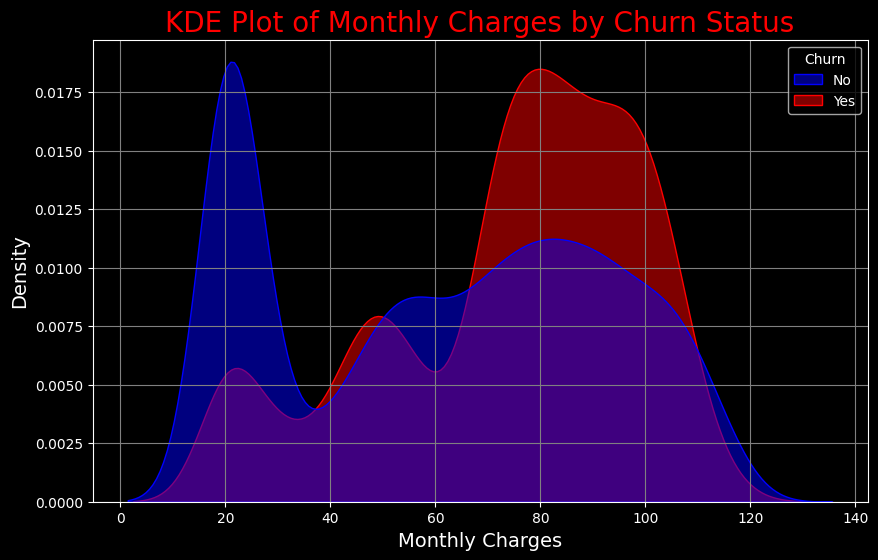

In [73]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='MonthlyCharges', hue='Churn',
             fill=True, common_norm=False,
             palette={'Yes': 'red', 'No': 'blue'},
             alpha=0.5)
plt.title('KDE Plot of Monthly Charges by Churn Status', fontsize=20, color='red')
plt.xlabel('Monthly Charges', fontsize=14, color='white')
plt.ylabel('Density', fontsize=14, color='white')
plt.grid(True, color='gray')
plt.show()

In [74]:
### Total Charges Distrbution
min_charge = data['TotalCharges'].min()
max_charge = data['TotalCharges'].max()
# Print the results
print(f"Minimum Total Charges: {min_charge}")
print(f"Maximum Total Charges: {max_charge}")

Minimum Total Charges:  
Maximum Total Charges: 999.9


In [75]:
fig = px.box(data,y='TotalCharges',title="Total Charges Distribution", color_discrete_sequence=px.colors.sequential.Jet_r)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='darkorange'),
    template="plotly_dark",
    width=500,
    height=500
)
fig.add_annotation(
    text="T Charges",
    showarrow=False,
    font=dict(size=20, color="darkorange"),
    xref="paper", yref="paper",
    x=0.5, y=0.5
)
fig.show()

In [76]:
data.TotalCharges.replace(' ',0,inplace=True)
data.TotalCharges=data.TotalCharges.astype(float)

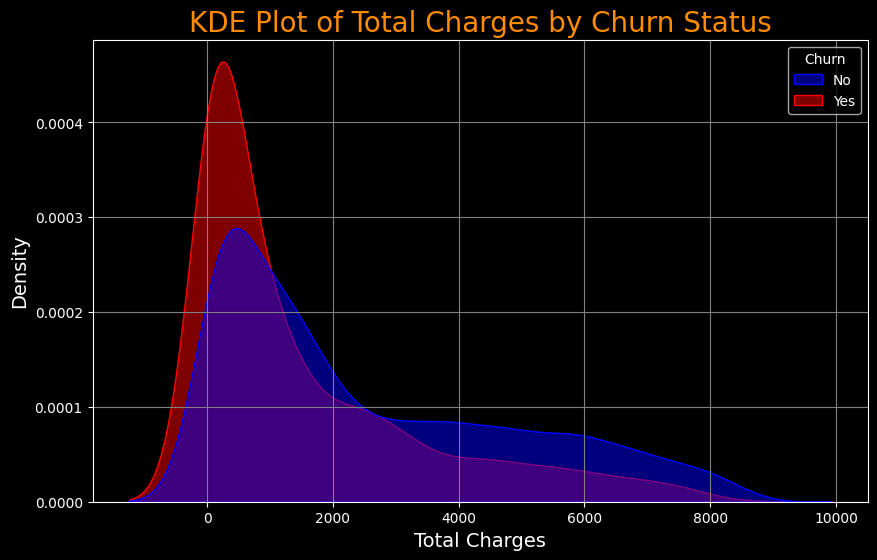

In [77]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='TotalCharges', hue='Churn',
             fill=True, common_norm=False,
             palette={'Yes': 'red', 'No': 'blue'},
             alpha=0.5)
plt.title('KDE Plot of Total Charges by Churn Status', fontsize=20, color='darkorange')
plt.xlabel('Total Charges', fontsize=14, color='white')
plt.ylabel('Density', fontsize=14, color='white')
plt.grid(True, color='gray')
plt.show()

In [79]:
### Churn Distrbution
data.Churn.value_counts().to_frame()

,count
Churn,
No,5174
Yes,1869


In [78]:
fig = px.pie(data, title="Churn Distribution",names="Churn", color_discrete_sequence=px.colors.sequential.dense_r)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='darkred'),
    template="plotly_dark",
    width=700,
    height=500
)
fig.add_annotation(
    text="Churn",
    showarrow=False,
    font=dict(size=20, color="darkred"),
    xref="paper", yref="paper",
    x=0.5, y=0.5
)
fig.show()

<center><span style="font-family:Palatino; font-size:22px;"><i> Graph Show  <span style="color:#DC143C;">Dataset</span> Imbalanced</i></span> </center>

**<a id="4"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Preprocessing</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [80]:
data.drop(['customerID'],axis=1,inplace=True)
columns = data.select_dtypes(include=['category','object']).columns
columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [81]:
### Transform Object Columns into Numbers
label_encoder = LabelEncoder()
data2 = data.copy()
for col in columns:
    data2[col] = label_encoder.fit_transform(data2[col])
data2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [85]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False)

encoded_data = onehot_encoder.fit_transform(data[columns])
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(columns))
data = data.drop(columns, axis=1)
data = pd.concat([data, encoded_df], axis=1)
data.drop('Churn_No', axis=1, inplace=True)
data.reset_index(drop=True, inplace=True)
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0,45,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [86]:
### Show Correlation
corr = data2.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000080,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.103006,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.317504,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.062078,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.826178,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113214,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452577,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175755,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253224,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.374410,-0.195525


In [87]:
mask = np.triu(np.ones_like(corr, dtype=bool))
df_mask = corr.mask(mask)
df_mask_rounded = df_mask.round(2)
fig = ff.create_annotated_heatmap(z=df_mask_rounded.values,
                                  x=df_mask_rounded.columns.tolist(),
                                  y=df_mask_rounded.columns.tolist(),
                                  colorscale='RdBu',
                                  hoverinfo='none',
                                  showscale=True,
                                  ygap=1,
                                  xgap=1
                                 )
fig.update_xaxes(side='bottom')
fig.update_layout(
    title_text='Heatmap',
    title_font=dict(size=20, color='red'),
    title_x=0.5,
    width=1000,
    height=700,
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True, autorange='reversed'),
    template='plotly_dark'
)
for annotation in fig.layout.annotations:
    if annotation.text == 'nan':
        annotation.text = ""
fig.show()

In [88]:
target_corr = corr[['Churn']].drop('Churn')
target_corr

,Churn
gender,-0.008612
SeniorCitizen,0.150889
Partner,-0.150448
Dependents,-0.164221
tenure,-0.352229
PhoneService,0.011942
MultipleLines,0.038037
InternetService,-0.047291
OnlineSecurity,-0.289309
OnlineBackup,-0.195525


In [89]:
mask = np.triu(np.ones_like(target_corr, dtype=bool))
df_mask = target_corr.mask(mask)
df_mask_rounded = df_mask.round(2)
fig = ff.create_annotated_heatmap(
    z=df_mask_rounded.values,
    x=['Churn'],
    y=df_mask_rounded.index.tolist(),
    colorscale='RdBu',
    hoverinfo='none',
    showscale=True,
    ygap=1,
    xgap=1
)
fig.update_xaxes(side='bottom')
fig.update_layout(
    title_text='Correlation with Churn',
    title_font=dict(size=20, color='red'),
    title_x=0.5,
    width=1000,
    height=700,
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True, autorange='reversed'),
    template='plotly_dark'
)
for annotation in fig.layout.annotations:
    if annotation.text == 'nan':
        annotation.text = ""

fig.show()

In [90]:
### Split
X = data.drop(['Churn_Yes'],axis=1)
y = data['Churn_Yes']
keys = X.columns
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,34,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,2,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,45,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,2,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
y.head()

In [91]:
### Scaling
scale = MinMaxScaler()
X = scale.fit_transform(X)
X = pd.DataFrame(X,columns=keys)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.013889,0.115423,0.003437,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.217564,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.012453,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.211951,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.017462,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                            random_state=42, shuffle =True,stratify=y)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (5634, 45)
X_test shape is  (1409, 45)
y_train shape is  (5634,)
y_test shape is  (1409,)


In [93]:
# Apply SMOTEN to the training data
smoten = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoten.fit_resample(X, y)
# Print the shapes after applying SMOTEN
print('X_resampled shape is ', X_resampled.shape)
print('y_resampled shape is ', y_resampled.shape)

X_resampled shape is  (6144, 45)
y_resampled shape is  (6144,)


In [94]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled,
                                                                           test_size=0.20,random_state=42, shuffle =True,stratify=y_resampled)
print('X_train_resampled shape is ' , X_train_resampled.shape)
print('X_test_resampled shape is ' , X_test_resampled.shape)
print('y_train_resampled shape is ' , y_train_resampled.shape)
print('y_test_resampled shape is ' , y_test_resampled.shape)

X_train_resampled shape is  (4915, 45)
X_test_resampled shape is  (1229, 45)
y_train_resampled shape is  (4915,)
y_test_resampled shape is  (1229,)


**<a id="5"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">ML Models</p></b></h1>
<a class="btn" href="#home">Tabel of Contents</a>

In [95]:
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(),
    'LGBM': LGBMClassifier(verbose=-1),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(random_state=42, class_weight='balanced'),
    'LogisticRegression': LogisticRegression(random_state=42, class_weight='balanced'),
    'CatBoost': CatBoostClassifier(logging_level='Silent'),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'NaiveBayes': GaussianNB()
}
### Validation Score
cv_results = {}
for model_name, model in models.items():
    print(f"Cross-validating {model_name}...")
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,verbose=0)
    cv_results[model_name] = cv_scores.mean()
    print(f"Mean accuracy for {model_name}: {cv_scores.mean():.4f}")

Cross-validating RandomForest...
Mean accuracy for RandomForest: 0.7916
Cross-validating XGBoost...
Mean accuracy for XGBoost: 0.7827
Cross-validating LGBM...
Mean accuracy for LGBM: 0.7932
Cross-validating DecisionTree...
Mean accuracy for DecisionTree: 0.7130
Cross-validating KNN...
Mean accuracy for KNN: 0.7636
Cross-validating SVC...
Mean accuracy for SVC: 0.7437
Cross-validating LogisticRegression...
Mean accuracy for LogisticRegression: 0.7513
Cross-validating CatBoost...
Mean accuracy for CatBoost: 0.7971
Cross-validating GradientBoosting...
Mean accuracy for GradientBoosting: 0.8023
Cross-validating AdaBoost...
Mean accuracy for AdaBoost: 0.8023
Cross-validating NaiveBayes...
Mean accuracy for NaiveBayes: 0.6949


In [96]:
cv_results_df = pd.DataFrame(list(cv_results.items()), columns=['Model', 'Mean Accuracy'])
cv_results_df = cv_results_df.sort_values(by='Mean Accuracy', ascending=False)
cv_results_df

,Model,Mean Accuracy
8,GradientBoosting,0.802270
9,AdaBoost,0.802269
7,CatBoost,0.797122
2,LGBM,0.793218
0,RandomForest,0.791620
1,XGBoost,0.782746
4,KNN,0.763574
6,LogisticRegression,0.751325
5,SVC,0.743694
3,DecisionTree,0.712990


In [97]:
best_model_name = cv_results_df.iloc[0]['Model']
print(f"\nBest model from CV: {best_model_name}")


Best model from CV: GradientBoosting


In [98]:
fig = px.bar(cv_results_df, x='Model', y='Mean Accuracy', title='Cross-Validation Accuracy for Different Models',text_auto=True,
             labels={'Mean Accuracy': 'Mean Accuracy'}, color='Mean Accuracy')
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='mediumorchid'),
    template="plotly_dark",
    width=800,
    height=600
)
fig.show()

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

# Reduce the size of grid for faster tuning (early stage)
reduced_param_grids = {
    'RandomForest': {
        'n_estimators': [100],
        'max_depth': [10, 30],
        'min_samples_split': [2, 5]
    },
    'XGBoost': {
        'max_depth': [5, 10],
        'n_estimators': [100],
        'subsample': [0.8],
        'learning_rate': [0.1]
    },
    'LGBM': {
        'n_estimators': [100],
        'max_depth': [10, 30],
        'learning_rate': [0.1]
    },
    'DecisionTree': {
        'max_depth': [10, 30],
        'min_samples_split': [2, 5]
    },
    'KNN': {
        'n_neighbors': [3, 5]
    },
    'SVC': {
        'C': [1],
        'kernel': ['rbf'],
        'gamma': ['scale']
    },
    'LogisticRegression': {
        'C': [0.1, 1],
        'penalty': ['l2'],
        'solver': ['liblinear']
    },
    'CatBoost': {
        'iterations': [100],
        'learning_rate': [0.1],
        'depth': [6, 10]
    },
    'GradientBoosting': {
        'n_estimators': [100],
        'learning_rate': [0.1],
        'max_depth': [10]
    },
    'AdaBoost': {
        'n_estimators': [100],
        'learning_rate': [0.1]
    },
    'NaiveBayes': {}
}

# You can tune only top N models later in detail
best_results = []
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f"\n🔍 Tuning: {model_name}")

    param_grid = reduced_param_grids.get(model_name, {})

    # Skip if no params to tune
    if not param_grid:
        model.fit(X_train, y_train)
        score = model.score(X_train, y_train)
        best_results.append({'Model': model_name, 'Best Score': score, 'Best Params': 'Default'})
        print(f"✅ Trained with default params. Accuracy: {score:.4f}")
        continue

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               cv=cv, scoring='accuracy', verbose=0, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_results.append({'Model': model_name, 'Best Score': best_score, 'Best Params': best_params})

    print(f"✅ Best params: {best_params}")
    print(f"✅ CV Accuracy: {best_score:.4f}")




🔍 Tuning: RandomForest
✅ Best params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
✅ CV Accuracy: 0.7984

🔍 Tuning: XGBoost
✅ Best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
✅ CV Accuracy: 0.7948

🔍 Tuning: LGBM
✅ Best params: {'learning_rate': 0.1, 'max_depth': 30, 'n_estimators': 100}
✅ CV Accuracy: 0.7934

🔍 Tuning: DecisionTree
✅ Best params: {'max_depth': 10, 'min_samples_split': 5}
✅ CV Accuracy: 0.7623

🔍 Tuning: KNN
✅ Best params: {'n_neighbors': 5}
✅ CV Accuracy: 0.7551

🔍 Tuning: SVC
✅ Best params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
✅ CV Accuracy: 0.7448

🔍 Tuning: LogisticRegression
✅ Best params: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
✅ CV Accuracy: 0.7483

🔍 Tuning: CatBoost
✅ Best params: {'depth': 6, 'iterations': 100, 'learning_rate': 0.1}
✅ CV Accuracy: 0.8009

🔍 Tuning: GradientBoosting
✅ Best params: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
✅ CV Accuracy: 0.7812

🔍 Tu

In [101]:
best_results_df = pd.DataFrame(best_results)
best_results_df = best_results_df.sort_values(by='Best Score', ascending=False)
best_results_df

,Model,Best Score,Best Params
7,CatBoost,0.800852,"{'depth': 6, 'iterations': 100, 'learning_rate..."
0,RandomForest,0.798367,"{'max_depth': 10, 'min_samples_split': 5, 'n_e..."
1,XGBoost,0.794817,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
2,LGBM,0.793397,"{'learning_rate': 0.1, 'max_depth': 30, 'n_est..."
9,AdaBoost,0.792510,"{'learning_rate': 0.1, 'n_estimators': 100}"
8,GradientBoosting,0.781150,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."
3,DecisionTree,0.762336,"{'max_depth': 10, 'min_samples_split': 5}"
4,KNN,0.755059,{'n_neighbors': 5}
6,LogisticRegression,0.748314,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}"
5,SVC,0.744764,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}"


In [102]:
best_model_name, best_model_param = best_results_df.iloc[0]['Model'],best_results_df.iloc[0]['Best Params']
print(f"\nBest model : {best_model_name}")
print(f"\nBest Parameters : {best_model_param}")


Best model : CatBoost

Best Parameters : {'depth': 6, 'iterations': 100, 'learning_rate': 0.1}


In [103]:
fig = px.bar(best_results_df, x='Model', y='Best Score',title='Best Cross-Validation Scores for All Models',text_auto=True,
             labels={'Best Score': 'Best Cross-Validation Score'}, color='Best Score')
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='mediumorchid'),
    template="plotly_dark",
    width=800,
    height=600
)
fig.show()

In [104]:
################# Best Model Train
model = CatBoostClassifier(logging_level='Silent' , depth = 6, iterations = 100, learning_rate = 0.05)
model.fit(X_train, y_train)

In [105]:
### Evaluate the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Training Precision: {train_precision:.2f}')
print(f'Training Recall: {train_recall:.2f}')
print(f'Training F1-Score: {train_f1:.2f}')
print('---')
print(f'Test Accuracy: {test_accuracy:.2f}')
print(f'Test Precision: {test_precision:.2f}')
print(f'Test Recall: {test_recall:.2f}')
print(f'Test F1-Score: {test_f1:.2f}')

Training Accuracy: 0.82
Training Precision: 0.72
Training Recall: 0.56
Training F1-Score: 0.63
---
Test Accuracy: 0.81
Test Precision: 0.68
Test Recall: 0.53
Test F1-Score: 0.59


In [106]:
# AUC and ROC curve for test set
y_test_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)
roc_data = {
    'False Positive Rate': fpr,
    'True Positive Rate': tpr
}
fig = px.line(
    roc_data,
    x='False Positive Rate',
    y='True Positive Rate',
    title=f'ROC Curve (AUC = {roc_auc:.2f})',
    labels={'x': 'False Positive Rate', 'y': 'True Positive Rate'},
    width=800,
    height=600
)
fig.add_shape(
    type='line',
    x0=0, y0=0, x1=1, y1=1,
    line=dict(color='red', dash='dash')
)
fig.update_layout(
    title_font=dict(size=20, color='mediumorchid'),
    title_x=0.5,
    xaxis=dict(showgrid=True, zeroline=True),
    yaxis=dict(showgrid=True, zeroline=True),
    template='plotly_dark'
)
fig.show()

Confusion Matrix is : 
 [[941  94]
 [177 197]]


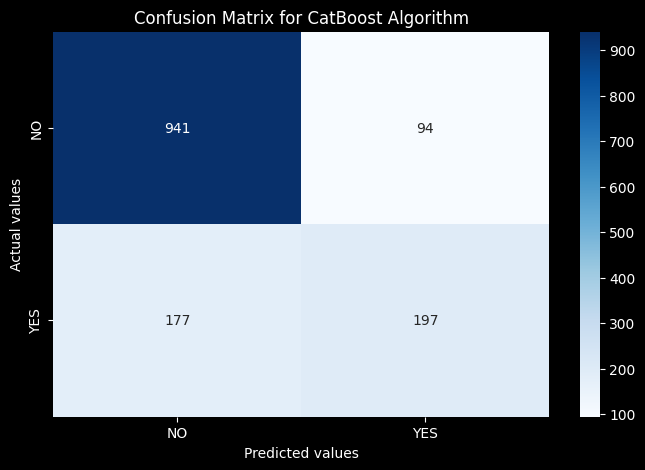

In [107]:
### Check model
CM = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix is : \n', CM)
plt.figure(figsize=(8,5))
sns.heatmap(data=CM, annot=True,fmt='g', cmap="Blues", xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title(f'Confusion Matrix for {best_model_name} Algorithm')
plt.show()

In [108]:
ClassificationReport = classification_report(y_test,y_test_pred,target_names=['NO', 'YES'])
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

          NO       0.84      0.91      0.87      1035
         YES       0.68      0.53      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [109]:
# Apply ML in SMOTEN to the training data
### Validation Score
cv_results = {}
for model_name, model in models.items():
    print(f"Cross-validating {model_name}...")
    cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy', n_jobs=-1,verbose=0)
    cv_results[model_name] = cv_scores.mean()
    print(f"Mean accuracy for {model_name}: {cv_scores.mean():.4f}")

Cross-validating RandomForest...
Mean accuracy for RandomForest: 0.9642
Cross-validating XGBoost...
Mean accuracy for XGBoost: 0.9640
Cross-validating LGBM...
Mean accuracy for LGBM: 0.9607
Cross-validating DecisionTree...
Mean accuracy for DecisionTree: 0.9361
Cross-validating KNN...
Mean accuracy for KNN: 0.9426
Cross-validating SVC...
Mean accuracy for SVC: 0.9398
Cross-validating LogisticRegression...
Mean accuracy for LogisticRegression: 0.9152
Cross-validating CatBoost...
Mean accuracy for CatBoost: 0.9607
Cross-validating GradientBoosting...
Mean accuracy for GradientBoosting: 0.9440
Cross-validating AdaBoost...
Mean accuracy for AdaBoost: 0.9312
Cross-validating NaiveBayes...
Mean accuracy for NaiveBayes: 0.9027


In [110]:
cv_results_df = pd.DataFrame(list(cv_results.items()), columns=['Model', 'Mean Accuracy'])
cv_results_df = cv_results_df.sort_values(by='Mean Accuracy', ascending=False)
cv_results_df

,Model,Mean Accuracy
0,RandomForest,0.964191
1,XGBoost,0.963988
2,LGBM,0.960732
7,CatBoost,0.960732
8,GradientBoosting,0.944049
4,KNN,0.942625
5,SVC,0.939776
3,DecisionTree,0.936114
9,AdaBoost,0.931231
6,LogisticRegression,0.915158


In [111]:
best_model_name = cv_results_df.iloc[0]['Model']
print(f"\nBest model from CV: {best_model_name}")


Best model from CV: RandomForest


In [112]:
fig = px.bar(cv_results_df, x='Model', y='Mean Accuracy', title='Cross-Validation Accuracy for Different Models',text_auto=True,
             labels={'Mean Accuracy': 'Mean Accuracy'}, color='Mean Accuracy')
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='mediumorchid'),
    template="plotly_dark",
    width=800,
    height=600
)
fig.show()

In [114]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import time
import warnings
warnings.filterwarnings('ignore')

# Smaller grid for faster tuning
reduced_param_grids = {
    'RandomForest': {
        'n_estimators': [100],
        'max_depth': [10, 30],
        'min_samples_split': [2, 5]
    },
    'XGBoost': {
        'max_depth': [5, 10],
        'n_estimators': [100],
        'subsample': [0.8],
        'learning_rate': [0.1]
    },
    'LGBM': {
        'n_estimators': [100],
        'max_depth': [10, 30],
        'learning_rate': [0.1]
    },
    'DecisionTree': {
        'max_depth': [10, 30],
        'min_samples_split': [2, 5]
    },
    'KNN': {
        'n_neighbors': [3, 5]
    },
    'SVC': {
        'C': [1],
        'kernel': ['rbf'],
        'gamma': ['scale']
    },
    'LogisticRegression': {
        'C': [0.1, 1],
        'penalty': ['l2'],
        'solver': ['liblinear']
    },
    'CatBoost': {
        'iterations': [100],
        'learning_rate': [0.1],
        'depth': [6, 10]
    },
    'GradientBoosting': {
        'n_estimators': [100],
        'learning_rate': [0.1],
        'max_depth': [10]
    },
    'AdaBoost': {
        'n_estimators': [100],
        'learning_rate': [0.1]
    },
    'NaiveBayes': {}  # no hyperparameters to tune
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
best_results = []

for model_name, model in models.items():
    print(f"\n🔍 Tuning {model_name}...")
    start_time = time.time()

    param_grid = reduced_param_grids.get(model_name, {})

    if not param_grid:  # For models like Naive Bayes
        model.fit(X_train_resampled, y_train_resampled)
        score = model.score(X_train_resampled, y_train_resampled)
        best_results.append({'Model': model_name, 'Best Score': score, 'Best Params': 'Default'})
        print(f"✅ Trained {model_name} with default params | Accuracy: {score:.4f}")
    else:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                                   cv=cv, scoring='accuracy', n_jobs=-1, verbose=0)
        grid_search.fit(X_train_resampled, y_train_resampled)
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        best_results.append({'Model': model_name, 'Best Score': best_score, 'Best Params': best_params})
        print(f"✅ Best Params: {best_params}")
        print(f"✅ CV Accuracy: {best_score:.4f}")

    print(f"⏱️ Time Taken: {time.time() - start_time:.2f} seconds")



🔍 Tuning RandomForest...
✅ Best Params: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100}
✅ CV Accuracy: 0.9622
⏱️ Time Taken: 15.97 seconds

🔍 Tuning XGBoost...
✅ Best Params: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}
✅ CV Accuracy: 0.9593
⏱️ Time Taken: 4.35 seconds

🔍 Tuning LGBM...
✅ Best Params: {'learning_rate': 0.1, 'max_depth': 30, 'n_estimators': 100}
✅ CV Accuracy: 0.9593
⏱️ Time Taken: 9.58 seconds

🔍 Tuning DecisionTree...
✅ Best Params: {'max_depth': 30, 'min_samples_split': 2}
✅ CV Accuracy: 0.9351
⏱️ Time Taken: 0.67 seconds

🔍 Tuning KNN...
✅ Best Params: {'n_neighbors': 3}
✅ CV Accuracy: 0.9467
⏱️ Time Taken: 1.07 seconds

🔍 Tuning SVC...
✅ Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
✅ CV Accuracy: 0.9384
⏱️ Time Taken: 2.81 seconds

🔍 Tuning LogisticRegression...
✅ Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
✅ CV Accuracy: 0.9158
⏱️ Time Taken: 0.40 seconds

🔍 Tuning CatBoost...
✅ Best P

In [115]:
best_results_df = pd.DataFrame(best_results)
best_results_df = best_results_df.sort_values(by='Best Score', ascending=False)
best_results_df

,Model,Best Score,Best Params
0,RandomForest,0.962157,"{'max_depth': 30, 'min_samples_split': 2, 'n_e..."
7,CatBoost,0.961750,"{'depth': 10, 'iterations': 100, 'learning_rat..."
2,LGBM,0.959309,"{'learning_rate': 0.1, 'max_depth': 30, 'n_est..."
1,XGBoost,0.959309,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."
4,KNN,0.946693,{'n_neighbors': 3}
8,GradientBoosting,0.946490,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est..."
5,SVC,0.938352,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}"
3,DecisionTree,0.935097,"{'max_depth': 30, 'min_samples_split': 2}"
9,AdaBoost,0.919227,"{'learning_rate': 0.1, 'n_estimators': 100}"
6,LogisticRegression,0.915768,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}"


In [116]:
best_model_name, best_model_param = best_results_df.iloc[0]['Model'],best_results_df.iloc[0]['Best Params']
print(f"\nBest model : {best_model_name}")
print(f"\nBest Parameters : {best_model_param}")


Best model : RandomForest

Best Parameters : {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 100}


In [117]:
fig = px.bar(best_results_df, x='Model', y='Best Score',title='Best Cross-Validation Scores for All Models',text_auto=True,
             labels={'Best Score': 'Best Cross-Validation Score'}, color='Best Score')
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='mediumorchid'),
    template="plotly_dark",
    width=800,
    height=600
)
fig.show()

In [118]:
################# Best Model Training
model = CatBoostClassifier(logging_level='Silent' , depth = 10, iterations = 100, learning_rate = 0.5)
model.fit(X_train_resampled, y_train_resampled)

In [119]:
### Evaluate the model
y_train_pred = model.predict(X_train_resampled)
y_test_pred = model.predict(X_test_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred)
train_recall = recall_score(y_train_resampled, y_train_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test_resampled, y_test_pred)
test_precision = precision_score(y_test_resampled, y_test_pred)
test_recall = recall_score(y_test_resampled, y_test_pred)
test_f1 = f1_score(y_test_resampled, y_test_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Training Precision: {train_precision:.2f}')
print(f'Training Recall: {train_recall:.2f}')
print(f'Training F1-Score: {train_f1:.2f}')
print('---')
print(f'Test Accuracy: {test_accuracy:.2f}')
print(f'Test Precision: {test_precision:.2f}')
print(f'Test Recall: {test_recall:.2f}')
print(f'Test F1-Score: {test_f1:.2f}')

Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00
Training F1-Score: 1.00
---
Test Accuracy: 0.97
Test Precision: 0.97
Test Recall: 0.98
Test F1-Score: 0.97


In [120]:
# AUC and ROC curve for test set
y_test_prob = model.predict_proba(X_test_resampled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_resampled, y_test_prob)
roc_auc = roc_auc_score(y_test_resampled, y_test_prob)
roc_data = {
    'False Positive Rate': fpr,
    'True Positive Rate': tpr
}
fig = px.line(
    roc_data,
    x='False Positive Rate',
    y='True Positive Rate',
    title=f'ROC Curve (AUC = {roc_auc:.2f})',
    labels={'x': 'False Positive Rate', 'y': 'True Positive Rate'},
    width=800,
    height=600
)
fig.add_shape(
    type='line',
    x0=0, y0=0, x1=1, y1=1,
    line=dict(color='red', dash='dash')
)
fig.update_layout(
    title_font=dict(size=20, color='mediumorchid'),
    title_x=0.5,
    xaxis=dict(showgrid=True, zeroline=True),
    yaxis=dict(showgrid=True, zeroline=True),
    template='plotly_dark'
)
fig.show()

Confusion Matrix is : 
 [[527  23]
 [ 16 663]]


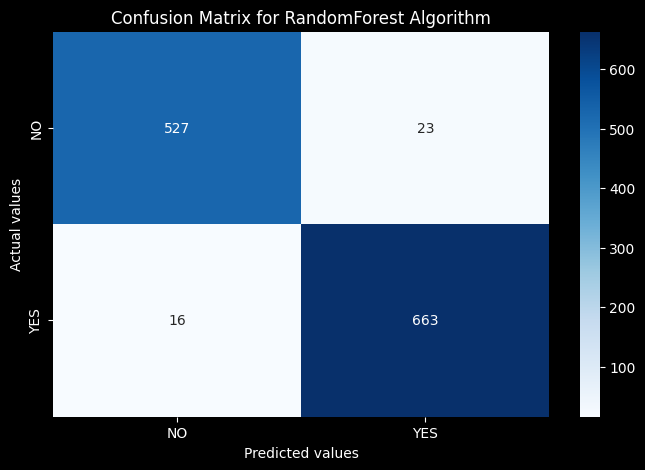

In [121]:
### Check model
CM = confusion_matrix(y_test_resampled, y_test_pred)
print('Confusion Matrix is : \n', CM)
plt.figure(figsize=(8,5))
sns.heatmap(data=CM, annot=True,fmt='g', cmap="Blues", xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title(f'Confusion Matrix for {best_model_name} Algorithm')
plt.show()

In [123]:
ClassificationReport = classification_report(y_test_resampled,y_test_pred,target_names=['NO', 'YES'])
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

          NO       0.97      0.96      0.96       550
         YES       0.97      0.98      0.97       679

    accuracy                           0.97      1229
   macro avg       0.97      0.97      0.97      1229
weighted avg       0.97      0.97      0.97      1229



<center><span style="font-family:Palatino; font-size:22px;"><i>Like this? <span style="color:#DC143C;">Upvote and Comment!</span> </i>🌊 End</span> </center>